# Table of Content
- Imports
- Load Data
- Methods
- EAD (Unaltered Data)
- Data Cleaning Process/Plan

# Imports

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import pandas as pd
import seaborn as sns
import squarify
%matplotlib inline

# Load Data

In [4]:
_  = os.path.join('data', 'Video_Games_Sales_as_at_22_Dec_2016.csv')
video_game_df = pd.read_csv(_)

# Methods

In [256]:
%run -i "scripts//methods_globals_constants.py"

<Figure size 432x288 with 0 Axes>

# EAD (Unaltered Data)

Even in the first five rows there are missing values. The feature Other_Sales, Global_Sales, Critic_Score, Critic_Count, User_Score, User_Count, Developer, and Rating were scrap from metacritic and added to Gregory Smith's web scrape of VGChartz but there are only "6900 cases are Completed"

In [ ]:
video_game_df.head()

- Rating, Developer, User_Count, User_Score, Critic_Score, and Critic_Count columns are missing ~ half of the observations
- There are two missing values in Names and Genres. These rows will be dropped
- Year of release is missing 269 values or ~ 1.61% of the data
- Publisher is missing 54 values or ~ -0.32% of the data

**Actions to be taken**
   - Two observations do not have names for the game title. These will be dropped
   - Two observations do not have genre. These will be dropped

In [ ]:
video_game_df.info()

- For all sales columns over 25% of the observations are zero
- Standard deviation seems to be effected by market size. North america appears to be a bigger market for video games

In [7]:
video_game_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


- The average number of missing value per year is ~ 172. 
- Below the year 1990 shows the least amount of missing values but number of games release was also less. 
  This may imply it was just easier to keep track of less games
- After 2016 the number of games released is unnoticable but I appoximate 5

**Action to be taken**

   - Games released after 2016 will be dropped, there aren't enough

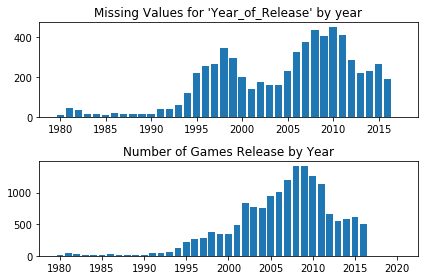

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=1)

y = video_game_df[video_game_df.Developer.isna()]['Year_of_Release'].value_counts()
x = video_game_df[video_game_df.Developer.isna()]['Year_of_Release'].value_counts().index
ax[0].bar(x=x, height=y)
ax[0].set_title("Missing Values for 'Year_of_Release' by year")

y = video_game_df['Year_of_Release'].value_counts()
x = video_game_df['Year_of_Release'].value_counts().index
ax[1].bar(x=x, height=y)
ax[1].set_title("Number of Games Release by Year")

plt.tight_layout();

- The Playstation and DS have the most games released
- The average global sales of Gameboy and NES are the highest but both of these consoles are not within the top 10 for number of games released. 
- Checking the varaince in global sales reveals the NES and GB also have the highest variances too. The distrubtions may not be normal and average might reflect extremely low and high global sales. Given that there were less games released for these consoles it support this hypothesis
- The global sales of game appears to be on an upward trend with particularity high point having what appear to be a normal distrubutions.
- The number of games in the past 30 years have increased until 2009. There seems to be a big drop off in 2011 for the number of games released.

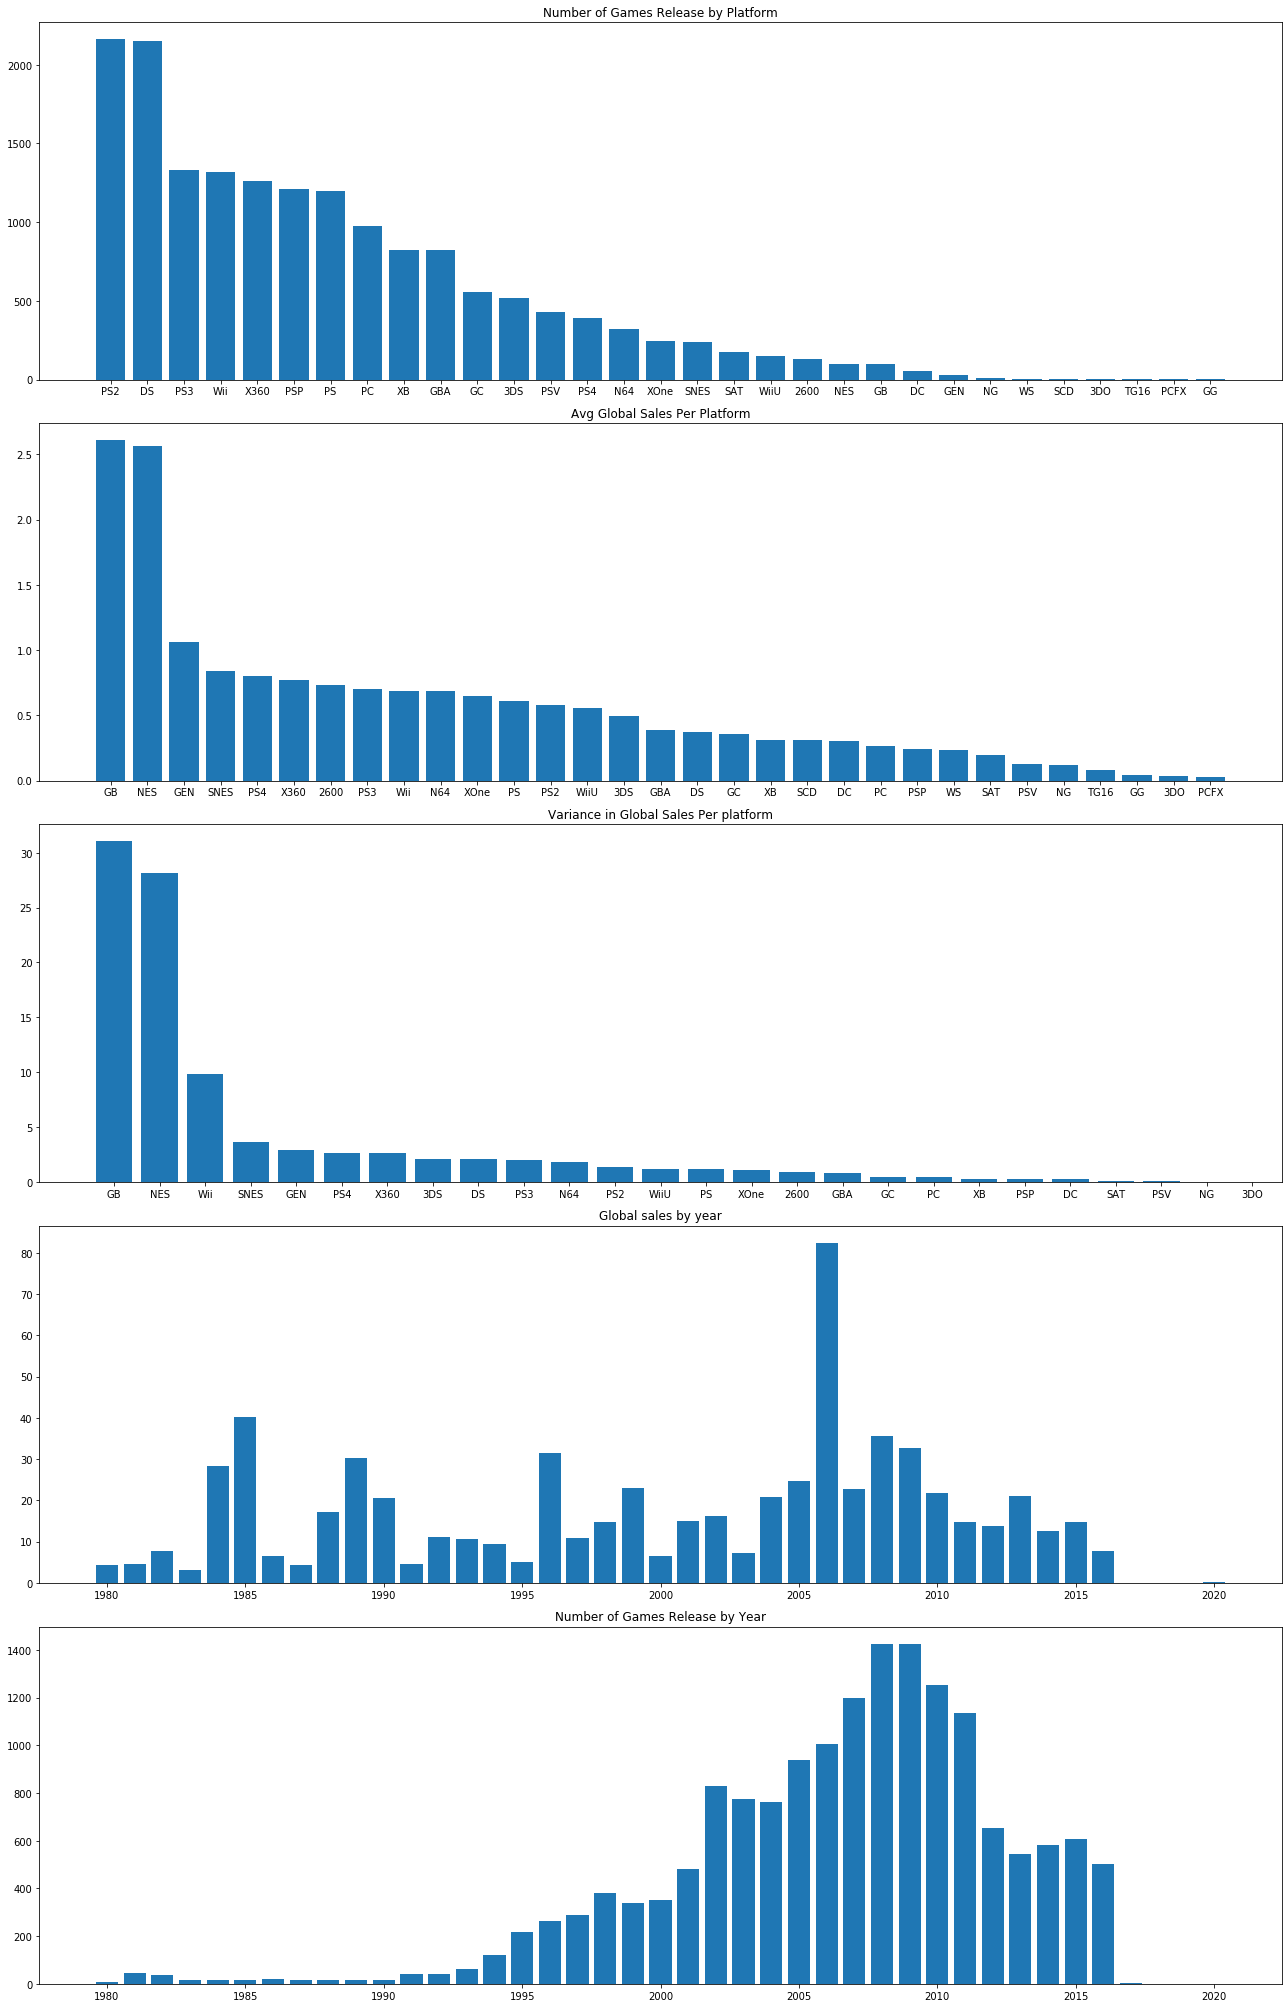

In [205]:
fig, ax = plt.subplots(nrows=5, ncols=1,figsize=(18,25))

y = video_game_df['Platform'].value_counts()
x = video_game_df['Platform'].value_counts().index
ax[0].bar(x=x, height=y)
ax[0].set_title("Number of Games Release by Platform")

y = video_game_df.groupby('Platform').mean().sort_values(by='Global_Sales', ascending=False)['Global_Sales']
x = video_game_df.groupby('Platform').mean().sort_values(by='Global_Sales', ascending=False).index
ax[1].bar(x=x, height=y)
ax[1].set_title("Avg Global Sales Per Platform")

y = video_game_df.groupby('Platform').var(ddof=8).sort_values(by='Global_Sales', ascending=False)['Global_Sales']
x = video_game_df.groupby('Platform').var(ddof=8).sort_values(by='Global_Sales', ascending=False).index
ax[2].bar(x=x, height=y)
ax[2].set_title("Variance in Global Sales Per platform")

y = video_game_df.sort_values(by='Global_Sales', ascending=False)['Global_Sales']
x = video_game_df.sort_values(by='Global_Sales', ascending=False)['Year_of_Release']
ax[3].bar(x=x, height=y)
ax[3].set_title("Global sales by year")

y = video_game_df['Year_of_Release'].value_counts()
x = video_game_df['Year_of_Release'].value_counts().index
ax[4].bar(x=x, height=y)
ax[4].set_title("Number of Games Release by Year")

- All distrubtions are not normal
- Histogram for GG and PC FX have negative values. This is usual for sales data.
- There are extremely low number of releases for these platforms.

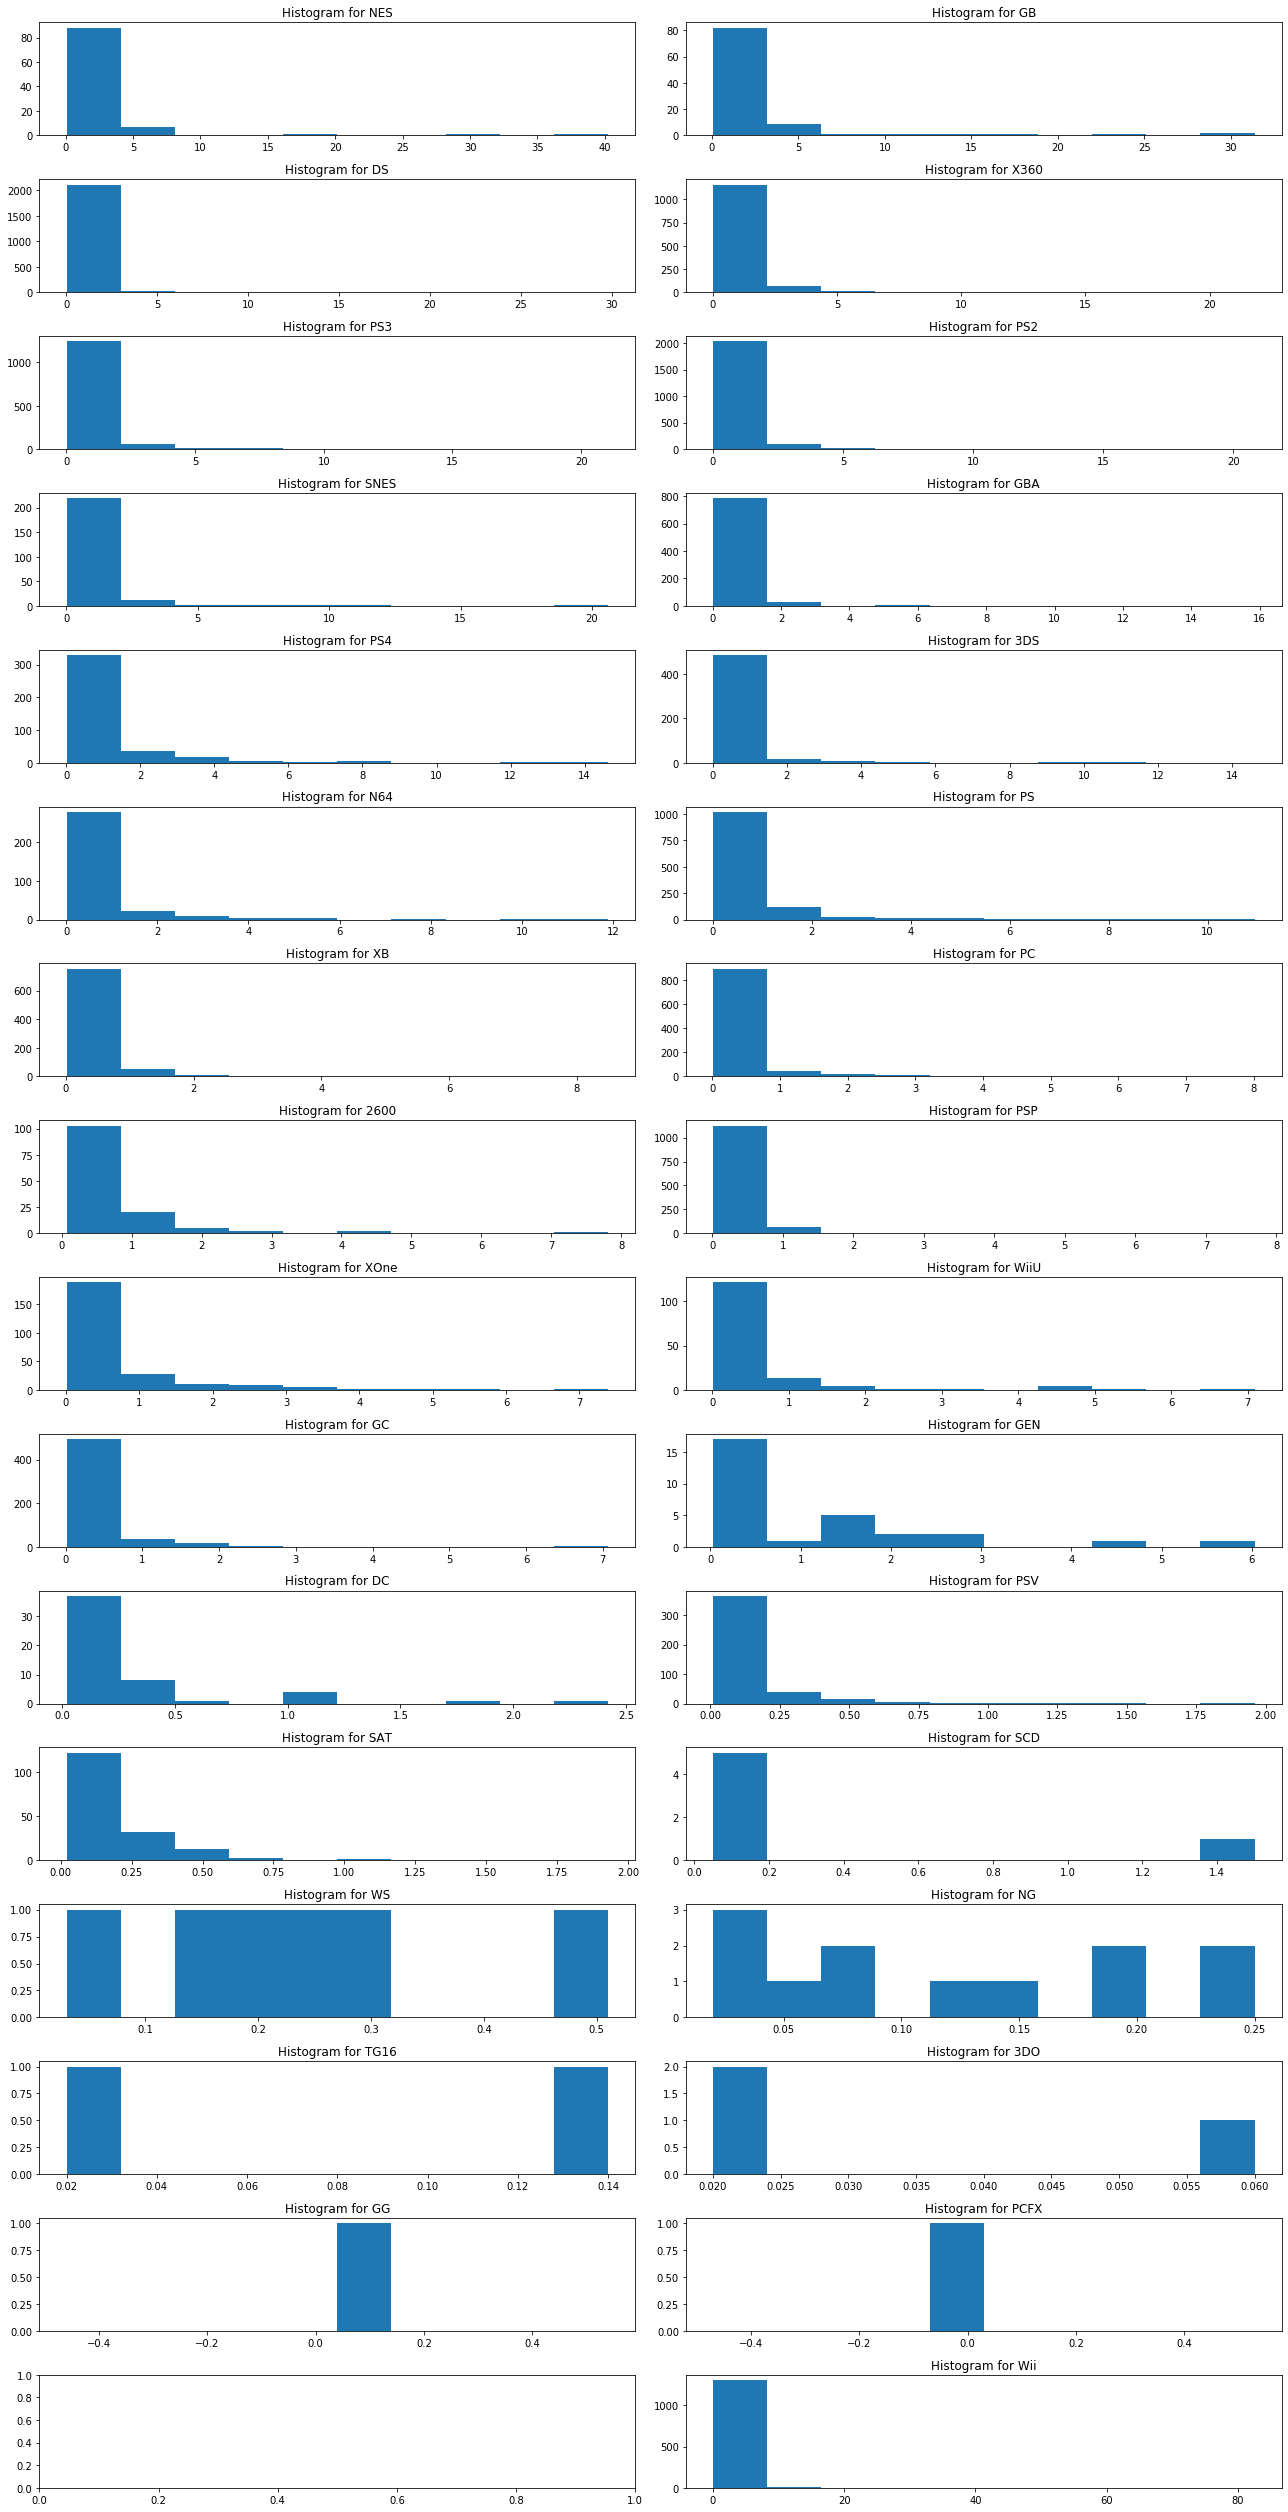

In [271]:
fig, ax = plt.subplots(nrows=16, ncols=2, figsize=(18,35))

for index, platform  in enumerate(video_game_df['Platform'].unique()): 
    if index != 0 or index != 32:
        row = (index-1)//2
        col = index%2-1
        
        
        x = video_game_df[video_game_df['Platform'] == platform]['Global_Sales']

        ax[row][col].hist(x=x)
        ax[row][col].set_title(f"Histogram for {platform}")

plt.tight_layout();

- The number of games released and global profit appears to have correlations however between 2000 - 2005 this correlation appeared to have weakened.

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))

x = video_game_df['Year_of_Release'].value_counts().sort_index().index
y = video_game_df.groupby('Year_of_Release').sum()['Global_Sales']
y2 = video_game_df['Year_of_Release'].value_counts().sort_index()
ax.plot(x, y)
ax.plot(x, y2)

ax.set_title('Comparasion between number of releases and global sales')
ax.set_ylabel('Global profit') 
ax.set_xlabel('Year')

ax.legend(handles=[mpatches.Patch(color='blue', label='Year and global sales'),
                    mpatches.Patch(color='red', label='Year and number of game released')]);

- There seems to be platforms that are under tracked. There are cases where only one game is recorded for a platform. 
- There is only one observation for 2020. 


**Actions to be taken**
   - The platforms with less than 20 recorded games released will be dropped 
   - The 2020 Obervation will be dropped.

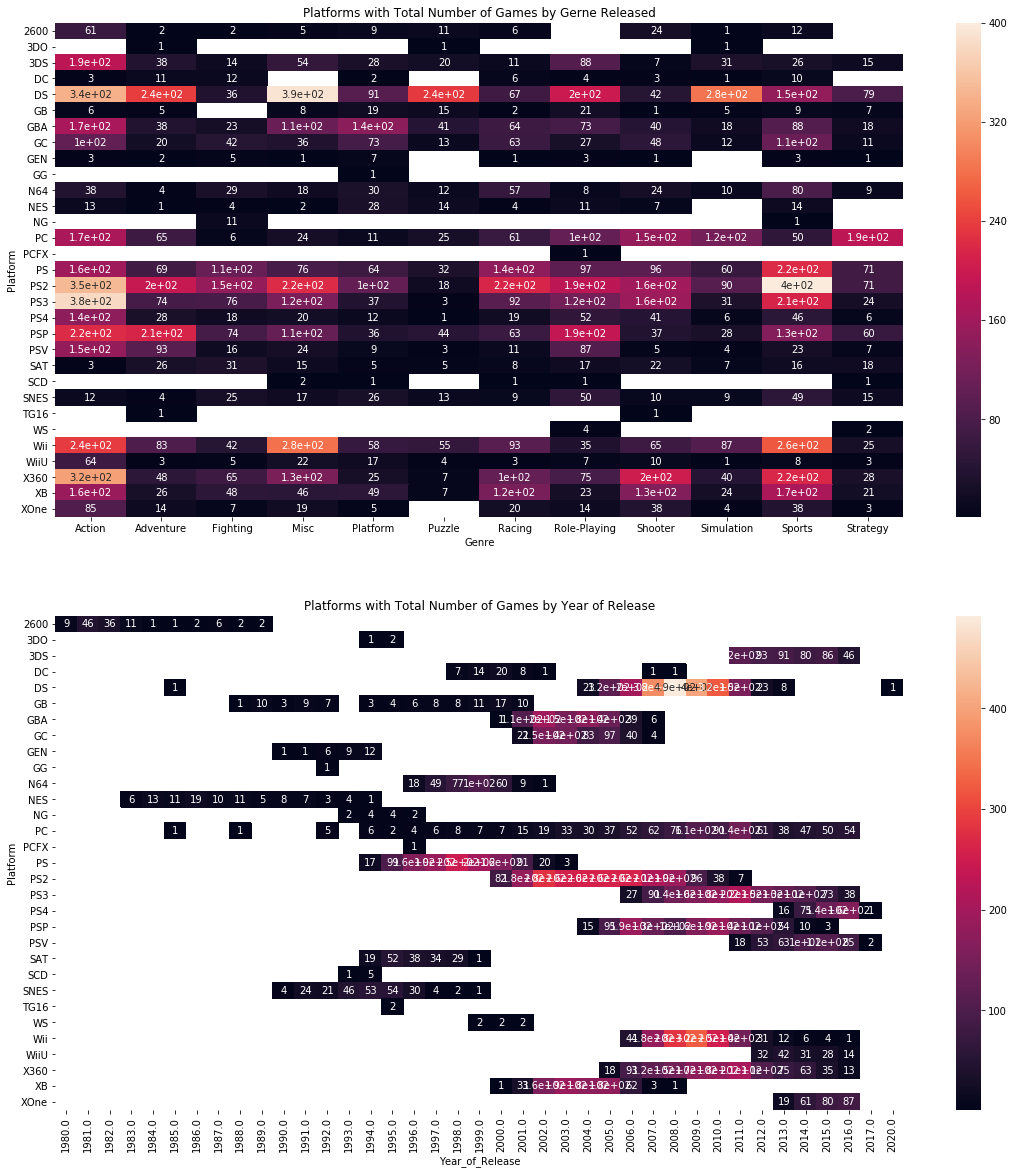

In [257]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(19,20))

_ = create_frequency_wide_df(video_game_df, 'Platform', 'Genre')
sns.heatmap(_, ax=ax[0], annot=True)
ax[0].set_title('Platforms with Total Number of Games by Gerne Released')


_ = create_frequency_wide_df(video_game_df, 'Platform', 'Year_of_Release')
sns.heatmap(_, ax=ax[1],annot=True)
ax[1].set_title('Platforms with Total Number of Games by Year of Release');

- Across 30 years of north american games sales, nintendo published games have accumatively made the most money
- The intensity of the color blue is not noticable for the majority of companies. This implies they all have made similar amount of money over the past 30 years. 
- 


In [ ]:
fig, ax = plt.subplots(nrows=5,figsize=(19,25))

_ = video_game_df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().sort_values(by='NA_Sales', ascending=False).reset_index() 
cmap = matplotlib.cm.Blues



tmp_df = _[_['NA_Sales'] != 0]
mini= tmp_df['NA_Sales'].min()
maxi= tmp_df['NA_Sales'].max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in tmp_df['NA_Sales']]
squarify.plot(sizes=tmp_df['NA_Sales'], label=tmp_df['Publisher'], alpha=.8, ax=ax[0], color=colors)
ax[0].set_title(f'Mapped Importances Based on 30 Years of North American Sales');


tmp_df = _[_['EU_Sales'] != 0]
mini= tmp_df['EU_Sales'].min()
maxi= tmp_df['EU_Sales'].max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in tmp_df['EU_Sales']]
squarify.plot(sizes=tmp_df['EU_Sales'], label=tmp_df['Publisher'], alpha=.8, ax=ax[1], color=colors)
ax[1].set_title(f'Mapped Importances Based on 30 Years of Europe Sales')

tmp_df = _[_['JP_Sales'] != 0]
mini= tmp_df['JP_Sales'].min()
maxi= tmp_df['JP_Sales'].max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in tmp_df['JP_Sales']]
squarify.plot(sizes=tmp_df['JP_Sales'], label=tmp_df['Publisher'], alpha=.8, ax=ax[2], color=colors)
ax[2].set_title(f'Mapped Importances Based on 30 Years of Japanese Sales');


tmp_df = _[_['Other_Sales'] != 0]
mini= tmp_df['Other_Sales'].min()
maxi= tmp_df['Other_Sales'].max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in tmp_df['Other_Sales']]
squarify.plot(sizes=tmp_df['Other_Sales'], label=tmp_df['Publisher'], alpha=.8, ax=ax[3], color=colors)
ax[3].set_title(f'Mapped Importances Based on 30 Years of Other Sales')


tmp_df = _[_['Global_Sales'] != 0]
mini= tmp_df['Global_Sales'].min()
maxi= tmp_df['Global_Sales'].max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in tmp_df['Global_Sales']]
squarify.plot(sizes=tmp_df['Global_Sales'], label=tmp_df['Publisher'], alpha=.8, ax=ax[4], color=colors)
ax[4].set_title(f'Mapped Importances Based on 30 Years of Global Sales');

-JP_sales, EU_Sales, NA_Sales, and Other_Sales are highly correlated with Global sales. This is basically nosie and all columns except global sales will be removed.

In [3]:
sns.heatmap(video_game_df.corr());

NameError: name 'video_game_df' is not defined

In [20]:
video_game_df[video_game_df['Global_Sales']>= 0.20].shape

(7714, 16)

- Discovered a values called "unknown" for the publisher. Checking the publisher by researched revealed that "unknown" wasn't a company name but actually unknown publishers. There are 201 games with unknown publishers 

# Data Cleaning Process/Plan
The blueprints for how the data will be cleaned

**Dropping**
- Two observations do not have names for the game title. These will be dropped [-2]
- Two observations do not have genre. These will be dropped [-2]
- The platforms with less than 20 recorded games released will be dropped [-5] 
- Games released after 2016 will be dropped, there aren't enough
- All null/Unknown publisher observation will be dropped if the developer value is not in the publisher column
- NA/EU/JP/Other_Sales columns will be dropped
- User/critic rating/total , and Developer columns will be dropped

**Fixing**
- All null/Unknown publisher observation will be turn into it's devloper value if the developer value is in the publisher column 
- year of release will be converted to int type

**Extraction**
- Game name character length will be a new feature
- Game name word total will be a new feature
- Total number of games release by the publisher will be a new feature
- **_Average global profit per publisher will be a new feature (Leaky, waiting til split)_**
- **_Platform public release date will be a new feature (Leaky, waiting til split)_**
- **_Average number of game released in 6 years for each platform will be a new feature (Leaky, waiting til split)_**
- **_average profit by genre will be a new feature for (Leaky, waiting til split)_**

In [246]:


# Add new feature number of game released by the publisher
_ = clean_df['Publisher'].value_counts()
clean_df['Total_Release_by_Publisher'] = clean_df['Publisher'].map(lambda name: _[name])

# Add new feature number of game released by the publisher
_ = clean_df['Platform'].value_counts()
clean_df['Total_Release_by_Platform'] = clean_df['Platform'].map(lambda name: _[name])

# Add new feature avg global sales by the publisher
_ = clean_df.groupby('Publisher').mean()['Global_Sales']
clean_df['Avg_Global_Sales_by_Publisher'] = clean_df['Publisher'].map(lambda name: _[name])

# Add new feature avg global sales by the plaform
_ = clean_df.groupby('Platform').mean()['Global_Sales']
clean_df['Avg_Global_Sales_by_Platform'] = clean_df['Platform'].map(lambda name: _[name])